# Esteban Marulanda Ardila  

# Project mini-course

# Problem 8.10, Sethna, on stochasticity in cell dynamics.

In this notebook there is a detailed description of the solution of the problem as well as the implemented code. The solution to the problem has been done in an ordered way, that is, solving the numerals in the order a, b and c .

Stochastic cells (Biology, Computation)  Living cells are amazingly complex mixtures of a variety of complex molecules (RNA, DNA, proteins, lipids, . . . ) that are constantly undergoing
reactions with one another. This complex of reactions has been compared to computation; the cell gets input from external and internal sensors, and through an intricate series of reactions produces an appropriate response. Thus, for example, receptor cells in the retina ‘listen’ for light and respond by triggering a nerve impulse. The kinetics of chemical reactions are usually described using differential equations for the concentrations of the various chemicals, and rarely are statistical fluctuations considered important. In a cell, the numbers of molecules of a given type can be rather small; indeed, there is (often) only one copy of the relevant part of DNA for a given reaction. It is an important question whether and when we may describe the dynamics inside the cell using continuous concentration variables, even though the actual numbers of molecules are always integers.

<!-- ![Imagen]([https://drive.google.com/file/d/1wmKkK-R1fAm7EnzfFcL0xN_BN_jqO2Gn/view?usp=sharing]) -->

Consider a dimerization reaction; a molecule M (called the ‘monomer’) joins up with another monomer and becomes a dimer D: 2M $ \leftrightarrow $ D. Proteins in cells often form dimers; sometimes (as here) both proteins are the same (homodimers) and sometimes they are different proteins (heterodimers). Suppose the forward reaction rate is $k_d$ and the backward reaction rate is $k_u$. Figure 8.11 shows this as a Petri net [50] with each reaction shown as a box, with incoming arrows showing species that are consumed by the reaction, and outgoing arrows showing species that are produced by the reaction; the number consumed or produced (the stoichiometry) is given by a label on each arrow. There
are thus two reactions: the backward unbinding reaction rate per unit volume is $k_u$ [D] (each dimer disassociates with rate ku), and the forward binding reaction rate per unit volume is $k_b M^2$ (since each monomer must wait for a collision with another monomer before binding, the rate is proportional to the monomer concentration squared).

The brackets [.] denote concentrations. We assume that the volume per cell is such that one molecule per cell is 1 nM ($10^{−9}$ moles per liter). For convenience, we shall pick nanomoles as our unit of concentration, so [M] is also the number of monomers in the cell. Assume $k_b$ =1 $nM^{−1}s^{-1}$ and $k_u $= 2 $s^{-1}$, and that at t = 0
all N monomers are unbound.

(a) Continuum dimerization. Write the differential equation for dM/dt treating M and D as continuous variables. (Hint: Remember that two M molecules are consumed in each reaction.) What are the equilibrium concentrations for [M] and [D] for N = 2 molecules in the cell, assuming these continuous equations and the values above for $k_b$ and $k_u$? For N = 90 and N = 10100 molecules? Numerically solve your differential equation for M(t) for N = 2 and N = 90, and verify that your solution settles down to the equilibrium values you found. 



# Solution. 

We set up differential equations

$$\frac{d[M]}{dt} = 2k_b[D] - 2k_b[M]^2, \quad \frac{d[D]}{dt} = k_b[M]^2 - k_u[D]$$

then, we use the conservation number of molecules $[M] + 2[D] = N$. Substituting out $[D]$ gives

$$ \frac{d[M]}{dt} = k_uN - k_u[M] - 2k_b[M]^2.$$

Setting $\frac{d[M]}{dt} = 0$ for equilibrium, we solve the quadratic equation, keeping only the positive solution,

$$[M]_0 = -\frac{k_u}{4k_b} + \sqrt{\left(\frac{k_u}{4k_b}\right)^2 + \frac{k_u}{2k_b}N} $$

For $k_u = 2\,\mathrm{s}^{-1}$ and $k_b = 1\,\mathrm{nM}^{-1}\mathrm{s}^{-1}$, we have $k_u/4k_b = \frac{1}{2}\,\mathrm{nM}$. For $N = 2\,\mathrm{nM}$ we find $[M]_0 = 1\,\mathrm{nM}$. For $N = 90\,\mathrm{nM}$ we get $[M]_0 = 9\,\mathrm{nM}$. Finally for $N = 10100\,\mathrm{nM}$ we have $[M]_0 = 100\,\mathrm{nM}$ and see that indeed 10100 wasn't a typo. Finally, we solve the differential equations numerically (with the initial condition of all monomers) and plot the results below to show agreement.


# Libraries

In [41]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from numba import jit, prange


# plot parameters
#plt.rcParams["text.usetex"] = False
plt.rcParams["font.family"] = "serif"
plt.rcParams["mathtext.fontset"] = "stix"#"dejavuserif" 
plt.rcParams["font.serif"] = ["Times New Roman"]
plt.rcParams['font.size'] =14;plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.titlesize'] = 12; plt.rcParams['legend.fontsize'] = 12
plt.rcParams['xtick.labelsize'] = 14;plt.rcParams['ytick.labelsize'] = 14
plt.rcParams['svg.fonttype'] = 'none'

# Solving the differential equation

Scipy's solve_ivp is used to solve the differential equation.

In [42]:
# Parameters
k_u = 2
k_b = 1

   
def dim_reaction1(t, y):
    """
    Represents the deterministic model for the dimerization reaction.

    Parameters:
    t (float): Current time (not used directly in this function but required for compatibility with ODE solvers).
    y (list or array): A two-element list or array containing:
                       y[0] = M (number of monomers),
                       y[1] = D (number of dimers).

    Returns:
    list: A two-element list containing the time derivatives of monomers and dimers:
          [dM_dt, dD_dt]
    """
    # Unpack the state variables
    M, D = y

    # Rate of change of monomers (M)
    # -2 * k_b * M * (M-1): Loss due to the formation of dimers (2 monomers are consumed per reaction).
    # +2 * k_u * D: Gain from the dissociation of dimers into two monomers.
    dM_dt = -2 * k_b * M**2 + 2 * k_u * D

    # Rate of change of dimers (D)
    # +k_b * M * (M-1): Formation of dimers from two monomers.
    # -k_u * D: Loss due to the dissociation of dimers back into monomers.
    dD_dt = k_b * M**2 - k_u * D

    # Return the rates of change as a list
    return [dM_dt, dD_dt]


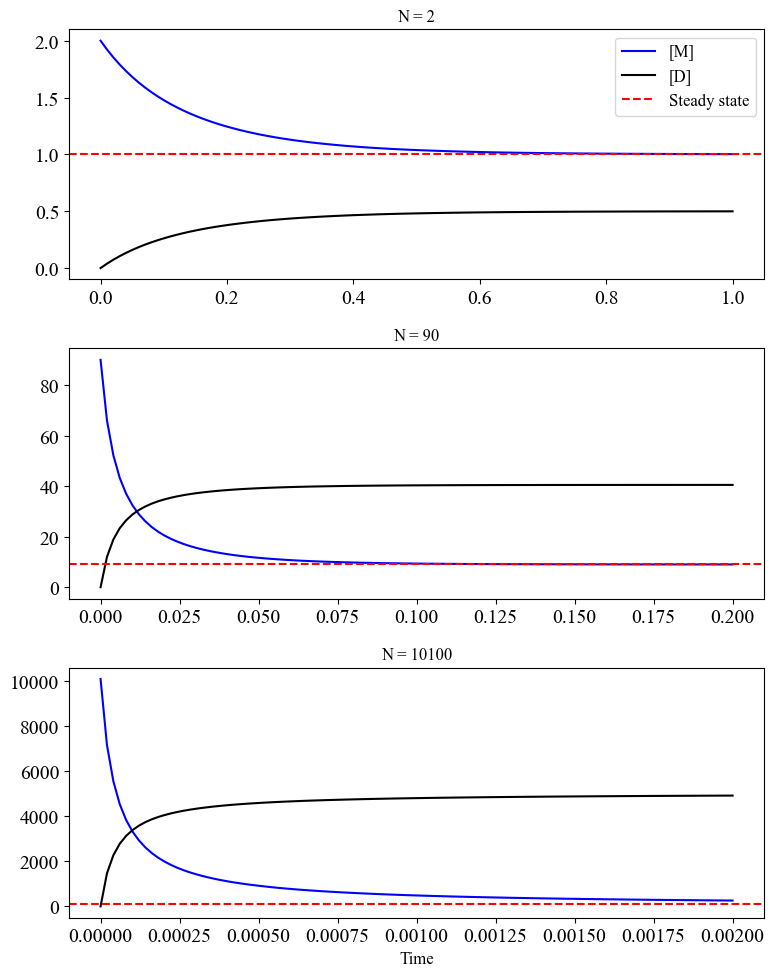

In [43]:
N_values = [2, 90,10100]  # Valores de N
M_steady_state = [1,9,100]
t_span = [(0, 1),(0, 0.2),(0, 0.002)]   # Intervalo de tiempo
t_eval1 = np.linspace(0, 1, 100)  # Puntos de evaluación del tiempo
t_eval2 = np.linspace(0, 0.2, 100)  # Puntos de evaluación del tiempo
t_eval3 = np.linspace(0, 0.002, 100)  # Puntos de evaluación del tiempo
t = [t_eval1,t_eval2,t_eval3]

# Crear subplots en una fila
fig, axes = plt.subplots(3,1, figsize=(8, 10))

# Resolver y graficar para cada valor de N
for i, N in enumerate(N_values):
    # Condición inicial: M(0) = N
    M0 = N
    # Resolver la EDO
    # sol = solve_ivp(dM_dt, t_span[i], [M0], args=(N, k_u, k_b), t_eval=t[i])
    sol = solve_ivp(dim_reaction1, t_span[i], [M0,0],  t_eval=t[i])
    # Graficar

    ax = axes[i]

    # Deterministic solution
    ax.plot(sol.t, sol.y[0], label="[M]", color="blue")
    ax.plot(sol.t, sol.y[1], label="[D]", color="black")
    # Graficar
    ax = axes[i]


    hline_value = M_steady_state[i]
    ax.axhline(y=hline_value, color='red', linestyle='--', label=f'Steady state')

    ax.set_title(f'N = {N}')

    # ax.grid()
#ax.set_ylim(0, M0)  # Limitar el eje Y entre 0 y M0
    if i == 0:
        #ax.set_ylabel('[M](t)')
        ax.legend()
        
    if i == 2:
        ax.set_xlabel('Time')

   

# Ajustar diseño
plt.tight_layout()

# Monte Carlo Algorithm.

For large numbers of molecules in the cell, we expect that the continuum equations may work well, but for just a few molecules there surely will be relatively large fluctuations. These fluctuations are called shot noise, named in early studies of electrical noise at low currents due to individual electrons in a resistor. We can implement a Monte Carlo algorithm to simulate this shot noise [36]. Suppose the reactions have rates $\Gamma_i$, with total rate $\Gamma_{tot}$ = $\sum_i \Gamma_i$. The idea is that the expected time to the next reaction is $1/\Gamma_{tot}$ , and the probability that the next reaction will be j is $\Gamma_j/\Gamma_{tot}$. To simulate until a final time $t_f$ , the algorithm runs as follows. To simulate until a final time $t_f$ , the algorithm runs as follows.

(1) Calculate a list of the rates of all reactions
in the system.


(2) Find the total rate Γtot.

(3) Pick a random time twait with probability
distribution $\rho(t) = \Gamma_{tot} \times \text{exp}(− \Gamma_{tot} t)$.

(4) If the current time t plus twait is bigger than
tf, no further reactions will take place; return.

(5) Otherwise,

– increment t by twait,

– pick a random number r uniformly distributed in the range [0, Γtot), $\sum_{i < j} \Gamma_i \leq r < \sum_{i < j+1} \Gamma_i$  (that is, $r$ lands in the $j$ th interval of the sum forming $\Gamma_{\text{tot}}$),

– execute that reaction, by incrementing each chemical involved by its stoichiometry.

(6) Repeat.

There is one important additional change the reaction rate for M total monomers binding is no longer $k_bM^2$ for discrete molecules; it is $k_bM(M − 1)$


(b) Stochastic dimerization. Implement this algorithm for the dimerization reaction of part (a).
Simulate for N = 2, N = 90, and N = 10100 and compare a few stochastic realizations with
the continuum solution. 

The implementation of the algorithm follows step by step the above described and a function called gillespie is created. For step 3 the function np.random.exponential($1/\Gamma_{tot}$) is used from the numpy library, which, according to the documentation, generates the desired random number distribution. For the comparison with the continuous case, the change of the reaction rate for M is taken into account and a function called dim_reaction2 is created.


In [44]:
@jit
def gillespie(N, k_b, k_u, tf):
    """
    Simulates the dimerization reaction using the Gillespie stochastic simulation algorithm.

    Parameters:
    N (int): Initial number of monomers in the system.
    k_b (float): Binding reaction rate constant.
    k_u (float): Unbinding reaction rate constant.
    tf (float): Final simulation time.

    Returns:
    tuple: 
        times (np.ndarray): Array of time points where reactions occurred.
        states (np.ndarray): Array of tuples (M, D) representing the number of monomers and dimers at each time step.
    """
    # Initialize monomer (M) and dimer (D) counts, as well as the time variable
    M, D = N, 0  # All molecules are monomers initially
    t = 0        # Start time
    times = [t]  # List to store reaction times
    states = [(M, D)]  # List to store states (M, D) at each recorded time

    # Main simulation loop: runs until time exceeds tf
    while t < tf:
        # Calculate reaction rates:
        # R1: Rate of 2M -> D (binding reaction)
        # R2: Rate of D -> 2M (unbinding reaction)
        R1 = k_b * M * (M - 1)      # Forward reaction rate
        R2 = k_u * D                # Backward reaction rate
        R_tot = R1 + R2             # Total reaction rate
        
        # If no reactions can occur, stop the simulation
        if R_tot == 0:
            break

        # Calculate the time until the next reaction
        # Using an exponential distribution with mean 1 / R_tot
        t_wait = np.random.exponential(1 / R_tot)
        t += t_wait  # Increment time

        # Determine which reaction occurs based on probabilities
        r = np.random.uniform(0, R_tot)  # Random number to select the reaction
        if r < R1:  # If within the range for the forward reaction
            M -= 2  # Two monomers are consumed
            D += 1  # One dimer is produced
        else:       # Otherwise, it's the backward reaction
            M += 2  # Two monomers are produced
            D -= 1  # One dimer is consumed

        # Record the current time and state
        times.append(t)
        states.append((M, D))
    
    # Convert the recorded times and states into numpy arrays for easier processing
    return np.array(times), np.array(states)



def dim_reaction2(t, y):
    """
    Represents the model for the dimerization reaction with the modified rate.

    Parameters:
    t (float): Current time (not used directly in this function but required for compatibility with ODE solvers).
    y (list or array): A two-element list or array containing:
                       y[0] = M (number of monomers),
                       y[1] = D (number of dimers).

    Returns:
    list: A two-element list containing the time derivatives of monomers and dimers:
          [dM_dt, dD_dt]
    """
    # Unpack the state variables
    M, D = y

    # Rate of change of monomers (M)
    # -2 * k_b * M * (M-1): Loss due to the formation of dimers (2 monomers are consumed per reaction).
    # +2 * k_u * D: Gain from the dissociation of dimers into two monomers.
    dM_dt = -2 * k_b * M * (M-1) + 2 * k_u * D

    # Rate of change of dimers (D)
    # +k_b * M * (M-1): Formation of dimers from two monomers.
    # -k_u * D: Loss due to the dissociation of dimers back into monomers.
    dD_dt = k_b * M * (M-1)  - k_u * D

    # Return the rates of change as a list
    return [dM_dt, dD_dt]

These functions are used and the graphs are plotted for the cases of the exercise.


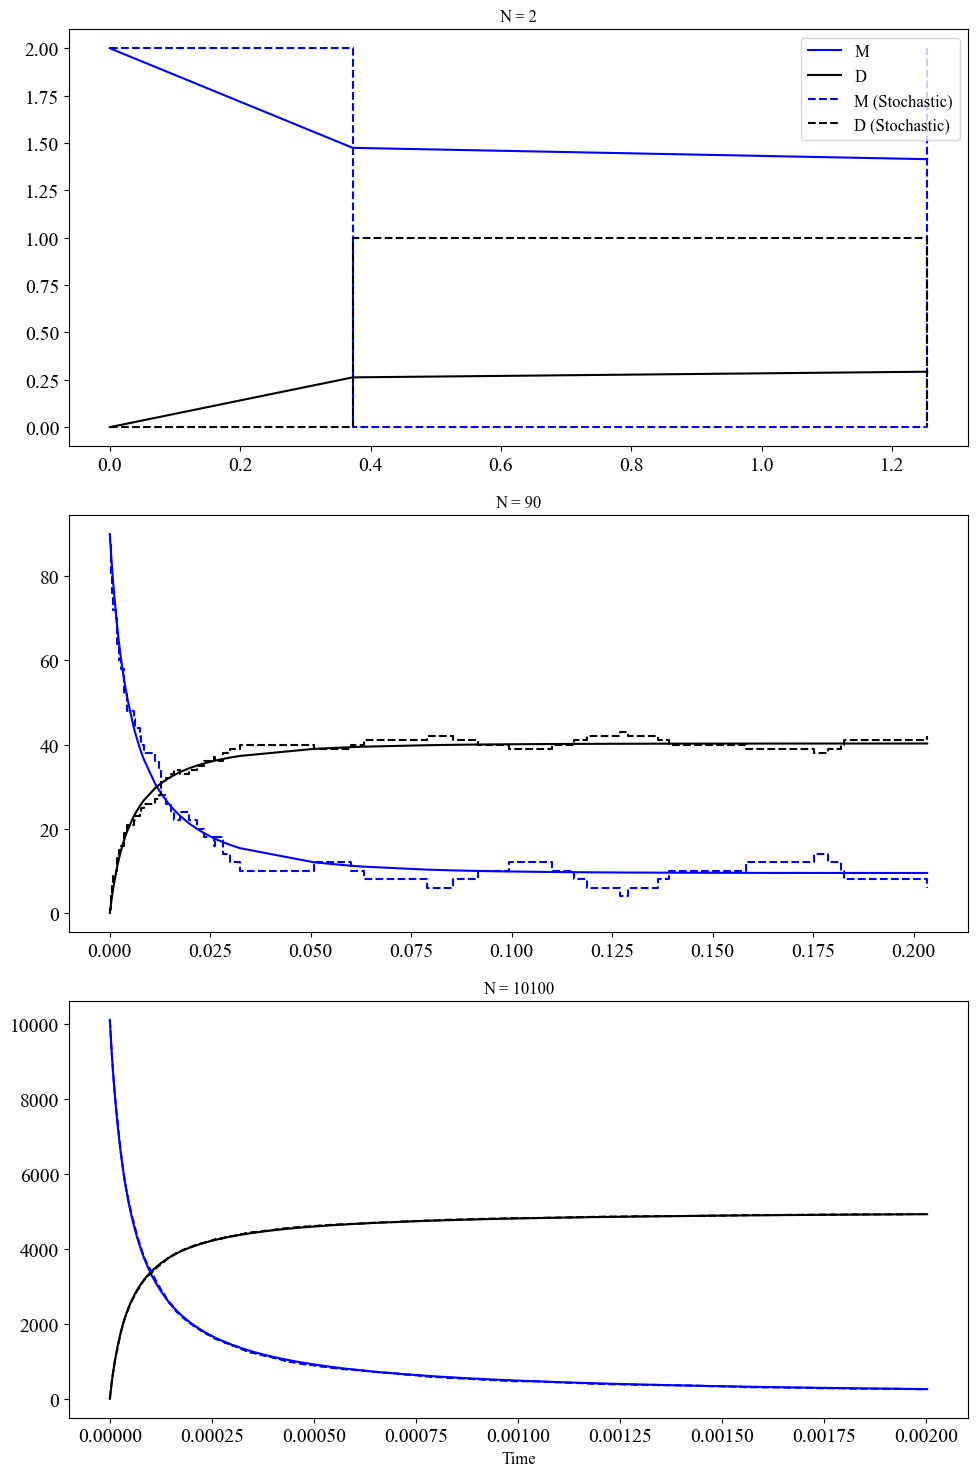

In [45]:
tf1,tf2,tf3 = 1,0.2, 0.002
t_span = [(0, tf1),(0, tf2),(0, tf3)]   # Intervalo de tiempo
itera = 100
t_eval1 = np.linspace(0, 1, itera)  # Puntos de evaluación del tiempo
t_eval2 = np.linspace(0, 0.2, itera)  # Puntos de evaluación del tiempo
t_eval3 = np.linspace(0, 0.002, itera)  # Puntos de evaluación del tiempo
t = [t_eval1,t_eval2,t_eval3]
N_values = [2, 90,10100]  # Valores de N

# Solve ODEs

# Crear subplots en una fila
fig, axes = plt.subplots(3,1, figsize=(10, 15))
cont = 3
# Resolver y graficar para cada valor de N
for i, N in enumerate(N_values):

    # Condición inicial: M(0) = N
    M0 = N_values[i]
    # sol = solve_ivp(deterministic, t_span[i], [M0,0], t_eval= t[i])

    # Run Gillespie simulation
    times_g, states_g = gillespie(N, k_b, k_u, t_span[i][1])
    sol = solve_ivp(dim_reaction2, (min(times_g),max(times_g)), [M0,0], t_eval= times_g)
    # Graficar
    ax = axes[i]

    # Deterministic solution
    ax.plot(sol.t, sol.y[0], label="M", color="blue")
    ax.plot(sol.t, sol.y[1], label="D", color="black")

    # Stochastic solution
    ax.step(times_g, states_g[:, 0], label="M (Stochastic)", color="blue", linestyle="--", where="post")
    ax.step(times_g, states_g[:, 1], label="D (Stochastic)", color="black", linestyle="--", where="post")

    # ax.set_title(f'Evolución para N = {N}')
    # ax.set_ylabel('M(t)')
        # plt.title("Dimerization Reaction: Deterministic vs Stochastic")
        # ax.grid()


    # ax.plot(sol.t, error_M, label="[M] (Deterministic)", color="blue")

    ax.set_title(f'N = {N}')

    # ax.grid()
#ax.set_ylim(0, M0)  # Limitar el eje Y entre 0 y M0
    if i == 0:
        #ax.set_ylabel('[M](t)')
        ax.legend(loc='upper right')
        
    if i == 2:
        ax.set_xlabel('Time')

# Ajustar diseño
plt.tight_layout()


How large a value of N do you need for the individual reactions to be well described by the continuum equations (say, fluctuations less than ±20% at late times)?

To do this we must take two things into account. We will consider large times as those from which the monomers are a fraction of the initial value, since we know that these have an asymptotic behavior in large times. On the other hand, from this value the percentage error with respect to the exact solution is calculated for each time instant and an average is calculated. This has been implemented with the function calculate_relative_percentage_error.

In [12]:
def calculate_relative_percentage_error(real_values, calculated_values, threshold_fraction=10):
    """
    Calculates the relative percentage error between two arrays of values, starting from values in real_values
    that are greater than a certain fraction of the maximum value in real_values.
    
    Parameters:
    - real_values (array-like): Array with the real values.
    - calculated_values (array-like): Array with the calculated values.
    - threshold_fraction (float): Fraction of the maximum value in real_values to use as the threshold.
    
    Returns:
    - relative_percentage_error (np.ndarray): Array with the relative percentage error for each point.
    """
    # Check that the two arrays have the same length
    if len(real_values) != len(calculated_values):
        raise ValueError("The arrays must have the same length.")
    
    # Determine the threshold value based on the maximum value of real_values
    threshold = np.max(real_values) / threshold_fraction
    
    # Filter values that are above the threshold
    valid_indices = real_values < threshold

    # Apply the filter to both real_values and calculated_values
    filtered_real_values = real_values[valid_indices]

    filtered_calculated_values = calculated_values[valid_indices]
    
    # Calculate the relative percentage error for the filtered values
    relative_percentage_error = np.abs((filtered_calculated_values - filtered_real_values) / filtered_real_values) * 100
    
    return np.mean(relative_percentage_error)


c:\Users\usuario_trabajo\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\usuario_trabajo\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Text(0.5, 0, 'N')

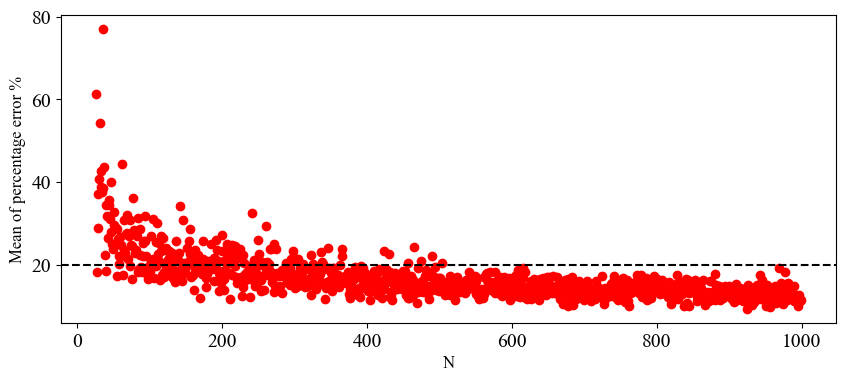

In [46]:
erros = []
Ns = np.arange(2,1000,1)
for N in Ns:
    # Run Gillespie simulation
    M0 = N
    times_g, states_g = gillespie(N, k_b, k_u, 0.3)
    sol = solve_ivp(dim_reaction2, (min(times_g),max(times_g)), [M0,0], t_eval= times_g)
    erros.append(calculate_relative_percentage_error(sol.y[0], states_g[:, 0], threshold_fraction=5))

f = plt.figure(figsize=(10,4))

plt.plot(Ns,erros,'ro')
plt.axhline(y=20, color='black', linestyle='--', label=f'Steady state')
plt.ylabel('Mean of percentage error %')
plt.xlabel('N')

According to this method of analysis, determining the exact N value from which the percentage error is below 20 % is considerably random, since it may be the case, as is evident in the graph, that small values (e.g. less than 200) have a mean percentage error greater or less than 20 %. Therefore, we consider N from which all values have a mean percentage error of less than 20 %, i.e. approximately N = 600. It should be noted that this value can certainly fluctuate due to the statistical nature of the simulation.

Measuring the concentrations in a single cell is often a challenge. Experiments often average over many cells. Such experiments will measure a smooth time evolution even though the individual cells are noisy. Let us investigate whether this ensemble average is well described by the continuum equations. 

(c) Average stochastic dimerization. Find the average of many realizations of your stochastic dimerization in part (b), for N = 2 and N = 90.

In [47]:
@jit
def stochastic_simulation(N, t_f, t_eval, num_realizations=1000):
    """Stochastic simulation for dimerization without interpolation."""
    all_M = np.zeros((num_realizations, len(t_eval)))

    for i in range(num_realizations):
        
        t = 0
        M = N
        D = 0
        idx = 0  # Index to track times in t_eval

        while t < t_f:
            # Reaction rates
            R_bind = k_b * M * (M - 1)
            R_unbind = k_u * D
            R_tot = R_bind + R_unbind

            if R_tot == 0:
                break

            # Time until next reaction
            t_wait = np.random.exponential(1 / R_tot)
            t += t_wait

            # Record M(t) at t_eval points
            while idx < len(t_eval) and t_eval[idx] <= t:
                all_M[i, idx] = M
                idx += 1

            if t > t_f:
                break

            # Determine which reaction occurs
            r = np.random.uniform(0, R_tot)
            if r < R_bind:  # Binding reaction
                M -= 2
                D += 1
            else:  # Unbinding reaction
                M += 2
                D -= 1

        # Fill remaining t_eval points with the l
        # ast value of M
        while idx < len(t_eval):
            all_M[i, idx] = M
            idx += 1

    return t_eval, all_M

def solution_dim(N, t_f, t_eval):
    """Solve equations for dimerization."""

    y0 = [N, 0]  # Initial concentrations
    t_span = (0, t_f)
    sol = solve_ivp(dim_reaction2, t_span, y0, t_eval=t_eval)
    return sol.t, sol.y[0], sol.y[1]


N = 2: Final average [M] = 1.00, Deterministic [M] = 1.41, Shift = 29.07%
N = 90: Final average [M] = 9.06, Deterministic [M] = 9.50, Shift = 4.64%


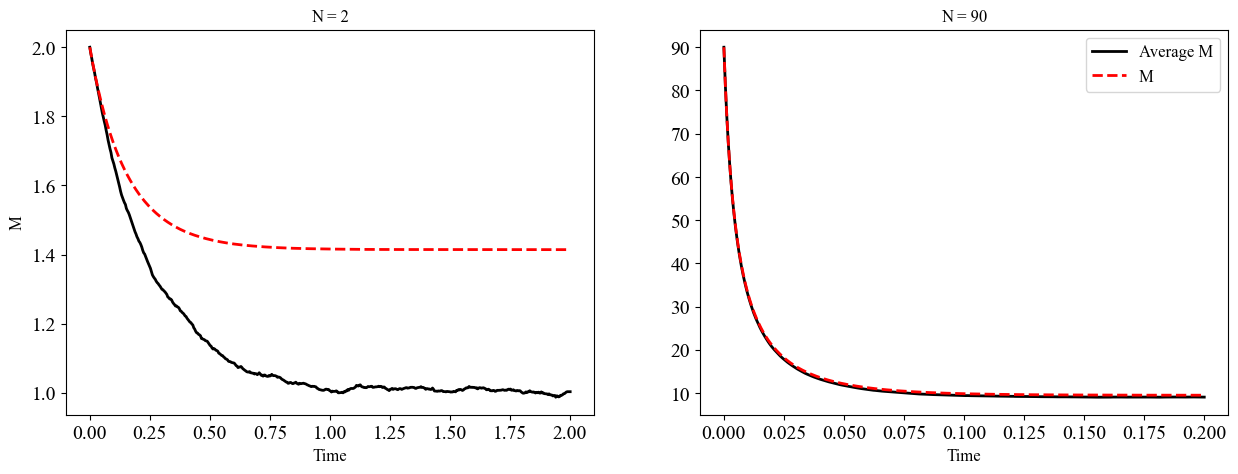

In [48]:
N_values = [2, 90]
num_realizations = 10000
fig, axes = plt.subplots(1,2, figsize=(15, 5))


for i,N in enumerate(N_values):
    # Adjust time intervals based on N
    if N == 90:
        t_f = 0.2
        t_eval = np.linspace(0, t_f, 1000)  # Finer resolution for larger N
    else:
        t_f = 2
        t_eval = np.linspace(0, t_f, 500)  # Coarser resolution for smaller N

    # Stochastic simulation
    t_stoch, all_M = stochastic_simulation(N, t_f, t_eval, num_realizations)
    
    avg_M = np.mean(all_M, axis=0)    
    # Deterministic solution
    t_d, M_d, D_d = solution_dim(N, t_f, t_eval)

    ax = axes[i]

    # for j in range(10): 
    #     ax.plot(t_stoch, all_M[j], color='gray', alpha=0.3, label="Stochastic realization" if j == 0 else "")

    ax.plot(t_stoch, avg_M, 'k-', label="Average M", linewidth=2)
    ax.plot(t_d, M_d, 'r--', label="M", linewidth=2)
    ax.set_xlabel("Time")
    ax.set_title(f"N = {N}")
    final_avg_M = avg_M[-1]
    final_deterministic_M = M_d[-1]
    relative_shift = abs(final_avg_M - final_deterministic_M) / final_deterministic_M * 100
    print(f"N = {N}: Final average [M] = {final_avg_M:.2f}, Deterministic [M] = {final_deterministic_M:.2f}, Shift = {relative_shift:.2f}%")

    if i == 0:
        ax.set_ylabel("M")
    else:
        ax.legend(loc='upper right')

        

How large a value of N do
you need for the ensemble average of M(t) to be
well described by the continuum equations (say,
shifted by less than 5% at late times)

In [49]:
N_values = np.arange(2,100,1)
num_realizations = 10000
t_f = 1
t_eval = np.linspace(0, t_f, 1000)  # Finer resolution for larger N
erros = []

for i,N in enumerate(N_values):

    t_stoch, all_M = stochastic_simulation(N, t_f, t_eval, num_realizations)
    
    avg_M = np.mean(all_M, axis=0)    
    # Deterministic solution
    t_d, M_d, D_d = solution_dim(N, t_f, t_eval)

    erros.append(calculate_relative_percentage_error(M_d, avg_M, threshold_fraction=5))

    # for j in range(10): 
    #     ax.plot(t_stoch, all_M[j], color='gray', alpha=0.3, label="Stochastic realization" if j == 0 else "")

    ax.plot(t_stoch, avg_M, 'k-', label="Average M", linewidth=2)
    ax.plot(t_d, M_d, 'r--', label="M", linewidth=2)


    if i == 0:
        ax.set_ylabel("M")
    else:
        ax.legend(loc='upper right')


c:\Users\usuario_trabajo\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\usuario_trabajo\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


C:\Users\usuario_trabajo\AppData\Local\Temp\ipykernel_24264\3523189715.py:33: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


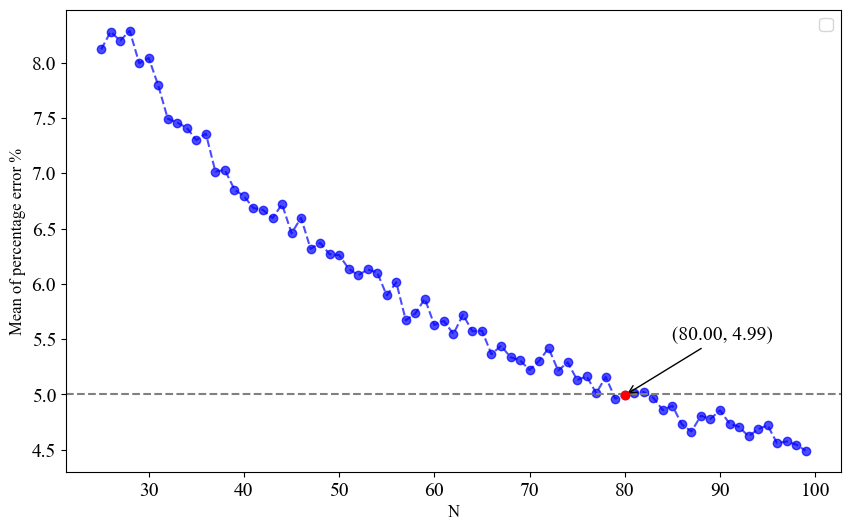

In [53]:
# Datos
erros = np.array(erros)

y_target = 5

# Filtrar valores válidos (excluir NaN)
valid_indices = ~np.isnan(erros)
N_valid = N_values[valid_indices]
y_valid = erros[valid_indices]

# Encontrar el índice del valor de y más cercano a y_target
index = np.argmin(np.abs(y_valid - y_target))
N_closest = N_valid[index]
y_closest = y_valid[index]

# Graficar
plt.figure(figsize=(10, 6))
plt.plot(N_values, erros, marker="o", linestyle="--", color="blue", alpha=0.7)
plt.scatter(N_closest, y_closest, color="red", zorder=5)
plt.axhline(y=y_target, color="gray", linestyle="--")

# Etiqueta para el punto más cercano
plt.annotate(
    f"({N_closest:.2f}, {y_closest:.2f})",
    xy=(N_closest, y_closest),
    xytext=(N_closest + 5, y_closest + 0.5),
    arrowprops=dict(facecolor="black", arrowstyle="->")
)
# Configuración del gráfico
plt.xlabel("N")
plt.ylabel('Mean of percentage error %')
# plt.title("Punto más cercano a y_target en el gráfico")
plt.legend()


